In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import linear_model

In [2]:
# Read in previously created data

customerSegmentation = pd.read_csv('customer_segmentation_clean.csv', low_memory=False)


# Data Preprocessing
- Create a Revenue column
- Drop 'InvoiceDate' column
- Aggregate customer orders per month 'Quantity', 'Revenue' 
- Randomly assign Male, Female, Non-Binary and random age between 20 - 60
- Create new 'Region' column

In [3]:
# Change InvoiceDate to a datetime column
customerSegmentation['InvoiceDate'] = pd.to_datetime(customerSegmentation['InvoiceDate'], format='mixed')

# Create a Month and Year dataset and drop InvoiceDate
customerSegmentation['Month'] = customerSegmentation['InvoiceDate'].dt.month

month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

customerSegmentation['month_name'] = customerSegmentation['Month'].map(month_labels)

customerSegmentation['Year'] = customerSegmentation['InvoiceDate'].dt.year

customerSegmentation = customerSegmentation[customerSegmentation['InvoiceDate'].dt.year != 2010].reset_index(drop=True)

# Change CustomerID to integer
customerSegmentation['CustomerID'] = customerSegmentation['CustomerID'].astype('int')


# Drop Region
customerSegmentation = customerSegmentation.drop('Region', axis=1)


In [4]:
import pandas as pd
import numpy as np

def filter_customers_by_month(df, months_to_drop, drop_percentage):

    # Input validation
    if not 0 <= drop_percentage <= 1:
        raise ValueError("drop_percentage must be between 0 and 1")
    
    if 'month_name' not in df.columns:
        raise ValueError("DataFrame must contain 'month_name' column")
        
    # Create a copy to avoid modifying the original DataFrame
    df_copy = df.copy()
    
    # Create mask 
    month_mask = df_copy['month_name'].isin(months_to_drop)
    
    # Generate random mask 
    random_mask = np.random.rand(len(df_copy)) < drop_percentage
    
    # Combine masks and create Drop column
    df_copy['Drop'] = month_mask & random_mask
    
    # Filter out dropped customers and remove Drop column
    filtered_df = df_copy[~df_copy['Drop']].drop(columns='Drop')
    
    return filtered_df


In [5]:
drop_perc_one = 0.3
months_to_drop_one = ['Jan', 'Feb', 'Dec']
drop_perc_two = 0.4
months_to_drop_two = ['Aug', 'Sept', 'Oct', 'Nov']

new_cust = filter_customers_by_month(customerSegmentation, months_to_drop_one, drop_perc_one)
customerSegmentation = filter_customers_by_month(new_cust, months_to_drop_two, drop_perc_two)

In [6]:
print(f"Date range: {customerSegmentation['InvoiceDate'].min()} to {customerSegmentation['InvoiceDate'].max()}")


Date range: 2011-01-04 10:00:00 to 2011-12-09 12:50:00


In [7]:
customerSegmentation.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Category,revenue,Month,month_name,Year
4,42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,Decoration,12.5,1,Jan,2011
5,42486,539993,85099B,JUMBO BAG RED RETROSPOT,10,2011-01-04 10:00:00,1.95,13313,Decoration,19.5,1,Jan,2011
6,42487,539993,20682,RED RETROSPOT CHILDRENS UMBRELLA,6,2011-01-04 10:00:00,3.25,13313,Decoration,19.5,1,Jan,2011
7,42488,539993,22961,JAM MAKING SET PRINTED,12,2011-01-04 10:00:00,1.45,13313,Crafts,17.4,1,Jan,2011
8,42489,539993,22667,RECIPE BOX RETROSPOT,6,2011-01-04 10:00:00,2.95,13313,Crafts,17.7,1,Jan,2011


In [8]:
customerSegmentation.describe()

,index,Quantity,InvoiceDate,UnitPrice,CustomerID,revenue,Month,Year
count,391265.000000,391265.000000,391265,391265.000000,391265.000000,391265.000000,391265.000000,391265.0
mean,275863.733761,10.887271,2011-07-11 16:21:19.690746368,3.853852,15280.097849,20.396281,6.835360,2011.0
min,42485.000000,1.000000,2011-01-04 10:00:00,0.001000,12346.000000,0.001000,1.000000,2011.0
25%,161833.000000,1.000000,2011-04-18 14:44:00,1.250000,13881.000000,3.900000,4.000000,2011.0
50%,261944.000000,4.000000,2011-07-13 12:06:00,2.080000,15159.000000,9.950000,7.000000,2011.0
75%,379433.000000,12.000000,2011-10-05 15:18:00,4.130000,16773.000000,17.700000,10.000000,2011.0
max,541905.000000,80995.000000,2011-12-09 12:50:00,11062.060000,18287.000000,168469.600000,12.000000,2011.0
std,136852.334723,179.806771,NaN,32.455189,1712.525100,311.190916,3.241616,0.0


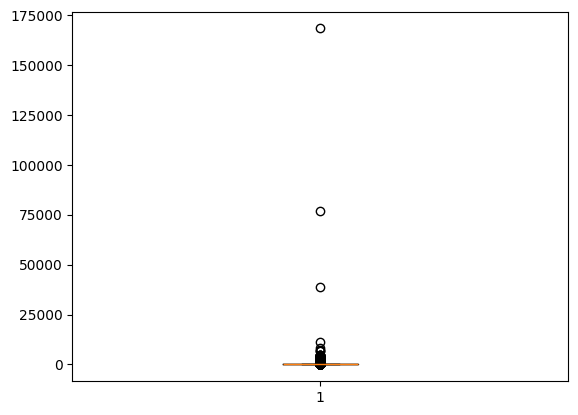

In [9]:
plt.boxplot(customerSegmentation['revenue'])
plt.show()

In [10]:
# Shuffle IDs
customerSegmentation['CustomerID'] = np.random.permutation(customerSegmentation['CustomerID'].values)

# Creating demographic information: Age, Sex, Region
unique_ids = customerSegmentation['CustomerID'].unique()

unique_ids = pd.DataFrame(unique_ids, columns=['CustomerID'])

# Randomly assign Sex
sex_weights = [.6, 1, .1]
unique_ids['Sex'] = np.random.choice(['Male', 'Female', 'Other'],
                                               size=len(unique_ids),
                                               p=np.array(sex_weights)/sum(sex_weights))

# Define custom probabilities for Age
age_range = range(20, 62)

# Assign probability
age_probabilities = [0.05 if age < 30 else 0.5 if age < 40 else 0.1 if age < 50 else 0.15 for age in age_range]

# Normalize 
age_probabilities = np.array(age_probabilities) / sum(age_probabilities)

# Randomly assign age
unique_ids['Age'] = np.random.choice(range(20,62),
                                               size=len(unique_ids))

# Regions 
regions = ['Northeast', 'South East', 'South', 'Midwest', 'Northwest', 'Southwest']

# Generate a list of regions
unique_ids['Region'] = np.random.choice(regions, size=len(unique_ids))

# Merge with main dataframe
customerSegmentation = customerSegmentation.merge(unique_ids, on='CustomerID')

# Fileter customer segmentation
customerSegmentation = customerSegmentation[customerSegmentation['revenue']<=800].copy()



In [11]:
customerSegmentation.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Category,revenue,Month,month_name,Year,Sex,Age,Region
0,42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,16033,Decoration,12.5,1,Jan,2011,Male,28,Northwest
1,42486,539993,85099B,JUMBO BAG RED RETROSPOT,10,2011-01-04 10:00:00,1.95,17975,Decoration,19.5,1,Jan,2011,Female,61,South East
2,42487,539993,20682,RED RETROSPOT CHILDRENS UMBRELLA,6,2011-01-04 10:00:00,3.25,14645,Decoration,19.5,1,Jan,2011,Male,22,Northeast
3,42488,539993,22961,JAM MAKING SET PRINTED,12,2011-01-04 10:00:00,1.45,16698,Crafts,17.4,1,Jan,2011,Female,60,Northeast
4,42489,539993,22667,RECIPE BOX RETROSPOT,6,2011-01-04 10:00:00,2.95,13844,Crafts,17.7,1,Jan,2011,Female,29,Northwest


In [12]:
# Create InvoiceID to count number of orders
customerSegmentation.sort_values(by=['CustomerID', 'InvoiceDate'], inplace=True)

# Create InvoiceID
customerSegmentation['InvoiceNo'] = customerSegmentation.groupby('CustomerID').cumcount() + 1


In [13]:
customerSegmentation.describe()

,index,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,revenue,Month,Year,Age
count,390832.000000,390832.000000,390832.000000,390832,390832.000000,390832.000000,390832.000000,390832.000000,390832.0,390832.000000
mean,275840.203003,209.154002,9.978336,2011-07-11 15:54:24.351895296,3.576086,15280.139899,17.983909,6.834722,2011.0,40.146812
min,42485.000000,1.000000,1.000000,2011-01-04 10:00:00,0.001000,12346.000000,0.001000,1.000000,2011.0,20.000000
25%,161804.750000,23.000000,1.000000,2011-04-18 14:27:00,1.250000,13881.000000,3.900000,4.000000,2011.0,30.000000
50%,261915.500000,56.000000,4.000000,2011-07-13 12:06:00,2.080000,15159.000000,9.950000,7.000000,2011.0,40.000000
75%,379428.500000,143.000000,12.000000,2011-10-05 15:18:00,4.130000,16773.000000,17.700000,10.000000,2011.0,51.000000
max,541905.000000,6126.000000,3186.000000,2011-12-09 12:50:00,793.330000,18287.000000,799.000000,12.000000,2011.0,61.000000
std,136857.233041,573.590610,29.691908,NaN,10.357525,1712.539762,37.532523,3.241779,0.0,12.312821


In [14]:
# Save
customerSegmentation.to_csv('clean_customer_segmentation.csv')

# Now aggregate using the updated customerSegmentation
agg_df = customerSegmentation.groupby(['CustomerID', 'Age', 'Sex', 'Month', 'month_name']).agg({
    'Quantity': 'sum',
    'revenue': 'sum',
    'InvoiceNo': 'nunique' 
}).reset_index()


In [15]:
agg_df.describe()

,CustomerID,Age,Month,Quantity,revenue,InvoiceNo
count,49429.000000,49429.000000,49429.000000,49429.000000,49429.000000,49429.000000
mean,15296.962896,40.341196,6.510591,78.898076,142.197642,7.906937
std,1722.122950,12.285773,3.419332,179.929850,308.141870,15.727899
min,12346.000000,20.000000,1.000000,1.000000,0.210000,1.000000
25%,13809.000000,30.000000,4.000000,13.000000,28.140000,3.000000
50%,15297.000000,40.000000,7.000000,35.000000,66.780000,5.000000
75%,16776.000000,51.000000,9.000000,83.000000,157.500000,9.000000
max,18287.000000,61.000000,12.000000,9809.000000,17570.560000,779.000000


In [16]:
agg_df['CustomerID'].nunique()

4338

In [17]:
len(agg_df)

49429

In [18]:
agg_df['Sex'].value_counts()

Sex
Female    29326
Male      17097
Other      3006
Name: count, dtype: int64

In [19]:
agg_df.head()

,CustomerID,Age,Sex,Month,month_name,Quantity,revenue,InvoiceNo
0,12346,50,Female,1,Jan,18,25.90,2
1,12346,50,Female,3,Mar,10,16.50,1
2,12346,50,Female,4,Apr,18,31.90,3
3,12346,50,Female,6,Jun,39,44.07,5
4,12346,50,Female,7,Jul,8,13.52,1


In [20]:
# Change Age type
agg_df['Age'] = agg_df['Age'].astype(int)

# Create a binned Age column
bins = [19, 29, 39, 49, 59, 69]
labels =['20-29', '30-39', '40-49', '50-59', '60+']
agg_df['Age_bin'] = pd.cut(agg_df['Age'], bins=bins, labels=labels, right=True)

In [21]:
agg_df['Age_bin'].value_counts()

Age_bin
20-29    12205
50-59    11919
30-39    11590
40-49    11229
60+       2486
Name: count, dtype: int64

In [22]:
agg_df.describe()

,CustomerID,Age,Month,Quantity,revenue,InvoiceNo
count,49429.000000,49429.000000,49429.000000,49429.000000,49429.000000,49429.000000
mean,15296.962896,40.341196,6.510591,78.898076,142.197642,7.906937
std,1722.122950,12.285773,3.419332,179.929850,308.141870,15.727899
min,12346.000000,20.000000,1.000000,1.000000,0.210000,1.000000
25%,13809.000000,30.000000,4.000000,13.000000,28.140000,3.000000
50%,15297.000000,40.000000,7.000000,35.000000,66.780000,5.000000
75%,16776.000000,51.000000,9.000000,83.000000,157.500000,9.000000
max,18287.000000,61.000000,12.000000,9809.000000,17570.560000,779.000000


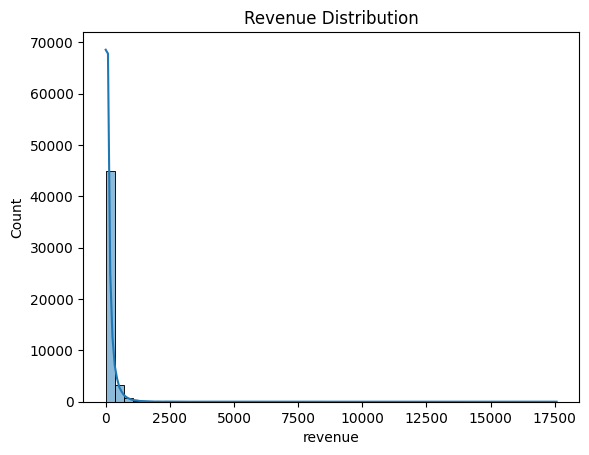

In [23]:
sns.histplot(agg_df['revenue'], bins=50, kde=True)
plt.title("Revenue Distribution")
plt.show()

In [24]:
agg_df.to_csv('aggregated_customer_segmentation.csv')

In [25]:
agg_df.head()

,CustomerID,Age,Sex,Month,month_name,Quantity,revenue,InvoiceNo,Age_bin
0,12346,50,Female,1,Jan,18,25.90,2,50-59
1,12346,50,Female,3,Mar,10,16.50,1,50-59
2,12346,50,Female,4,Apr,18,31.90,3,50-59
3,12346,50,Female,6,Jun,39,44.07,5,50-59
4,12346,50,Female,7,Jul,8,13.52,1,50-59
